# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `data/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import matplotlib.ticker as ticker
%matplotlib inline 

In [2]:
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", nrows=1000000)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [3]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", nrows=1000000)

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 13.1 s, sys: 2.31 s, total: 15.4 s
Wall time: 15.9 s


### Look at the first few rows

Make sure you can see **every single column.**

In [4]:
df.shape

(1000000, 53)

In [5]:
#currently, we can only see 20 columns
pd.options.display.max_columns

20

In [6]:
pd.set_option("display.max_columns",53)

In [7]:
df[:2]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10460.0,1110 WYATT STREET,WYATT STREET,DEVOE AVENUE,BRONX PARK AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09/05/2015 06:55:25 AM,The Police Department responded and upon arriv...,09/05/2015 02:06:54 AM,06 BRONX,BRONX,1018201.0,245083.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.839306,-73.877301,"(40.83930620730105, -73.8773009180668)"
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,NaN,NaN,NaN,NaN,WEST 151 STREET,BROADWAY,INTERSECTION,NEW YORK,NaN,Precinct,Closed,09/04/2015 09:53:45 PM,The Police Department responded to the complai...,09/04/2015 06:37:24 PM,09 MANHATTAN,MANHATTAN,998728.0,241754.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830222,-73.947684,"(40.830222460372724, -73.94768359377827)"


In [8]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [9]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv",nrows=1000000, usecols= ["Unique Key","Created Date", "Closed Date", "Agency", "Agency Name","Complaint Type","Descriptor","Borough"] )

CPU times: user 6.15 s, sys: 412 ms, total: 6.56 s
Wall time: 6.66 s


In [10]:
df[:2]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN


## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [11]:
subset_df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv",nrows=10000, usecols= ["Unique Key", "Created Date", "Closed Date", "Agency", "Agency Name","Complaint Type","Descriptor","Borough"] )

In [12]:
%%time
subset_df["Created Date"] = pd.to_datetime(subset_df["Created Date"])

CPU times: user 2.48 s, sys: 20.8 ms, total: 2.5 s
Wall time: 2.66 s


In [13]:
%%time
subset_df["Created Date"] = pd.to_datetime(subset_df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")

CPU times: user 655 µs, sys: 399 µs, total: 1.05 ms
Wall time: 1.17 ms


In [14]:
subset_df.dtypes

Unique Key                 int64
Created Date      datetime64[ns]
Closed Date               object
Agency                    object
Agency Name               object
Complaint Type            object
Descriptor                object
Borough                   object
dtype: object

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [15]:
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", usecols= ["Unique Key","Created Date", "Closed Date", "Agency", "Agency Name","Complaint Type","Descriptor","Borough"])

In [16]:
%%time
df["created_at"] = pd.to_datetime(df["Created Date"], format="%m/%d/%Y %I:%M:%S %p")

CPU times: user 9.59 s, sys: 122 ms, total: 9.71 s
Wall time: 9.98 s


In [17]:
%%time
df["closed_at"] = pd.to_datetime(df["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")

CPU times: user 8.93 s, sys: 97.6 ms, total: 9.03 s
Wall time: 9.16 s


In [18]:
df.shape

(1844278, 10)

### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [19]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,created_at,closed_at
0,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-04 22:55:25,2015-09-05 02:06:54
1,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 13:53:45,2015-09-04 18:37:24
2,31463992,09/04/2015 09:15:43 PM,09/04/2015 10:32:01 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 21:15:43,2015-09-04 22:32:01
3,31463993,09/05/2015 01:06:57 AM,09/05/2015 02:26:43 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,2015-09-05 01:06:57,2015-09-05 02:26:43
4,31463995,09/04/2015 07:48:25 AM,09/04/2015 05:21:18 PM,NYPD,New York City Police Department,Illegal Parking,Overnight Commercial Storage,BROOKLYN,2015-09-04 07:48:25,2015-09-04 17:21:18


In [20]:
df.dtypes

Unique Key                 int64
Created Date              object
Closed Date               object
Agency                    object
Agency Name               object
Complaint Type            object
Descriptor                object
Borough                   object
created_at        datetime64[ns]
closed_at         datetime64[ns]
dtype: object

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [21]:
df["Agency"].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [22]:
# This is the fist level of a hierarchy identifying the topic of the incident or condition. 
# Complaint Type may have a corresponding Descriptor (below) or may stand alone.

# This is  associated to the Complaint Type, and provides further detail on the incident or condition. 
# Descriptor values are dependent on the Complaint Type, and are not always required in SR. 

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [23]:
df.groupby("Agency")["Complaint Type"].value_counts().groupby(level=0).head()

Agency  Complaint Type          
DOT     Street Condition            215052
        Street Light Condition      187228
        Traffic Signal Condition     79737
        Broken Muni Meter            47234
        Street Sign - Damaged        12041
NYPD    Noise - Residential         429932
        Blocked Driveway            219927
        Illegal Parking             215158
        Noise - Street/Sidewalk     112890
        Noise - Commercial           93115
Name: Complaint Type, dtype: int64

In [24]:
df[df["Agency"] == "DOT"]["Complaint Type"].value_counts().head()

Street Condition            215052
Street Light Condition      187228
Traffic Signal Condition     79737
Broken Muni Meter            47234
Street Sign - Damaged        12041
Name: Complaint Type, dtype: int64

In [25]:
df[df["Agency"] == "NYPD"]["Complaint Type"].value_counts().head()

Noise - Residential        429932
Blocked Driveway           219927
Illegal Parking            215158
Noise - Street/Sidewalk    112890
Noise - Commercial          93115
Name: Complaint Type, dtype: int64

## When people are complaining about street conditions, what are they usually complaining about?

In [26]:
df[df["Complaint Type"] == "Street Condition"]["Descriptor"].value_counts()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Blocked - Construction              7034
Line/Marking - Faded                5230
Plate Condition - Noisy             3405
Wear & Tear                         2555
Plate Condition - Shifted           2004
Plate Condition - Open               671
Line/Marking - After Repaving        513
Dumpster - Construction Waste        181
Hummock                              177
Guard Rail - Street                  145
Crash Cushion Defect                 118
Maintenance Cover                     85
Unsafe Worksite                       56
Depression Maintenance                39
Strip Paving                          34
Plate Condition - Anti-Skid           25
Dumpster - Causing Damage             17
General Bad Condition                 15
Defacement                            15
Suspected Street

## What kinds of noise are they complaining about when making residential noise complaints?

In [27]:
df[df["Complaint Type"]== "Noise - Residential"]["Descriptor"].value_counts()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [28]:
df.set_index("created_at", inplace=True)

In [29]:
df.resample("M")["Unique Key"].count()

created_at
2015-01-31    58168
2015-02-28    59895
2015-03-31    87190
2015-04-30    78002
2015-05-31    87582
2015-06-30    84486
2015-07-31    77795
2015-08-31    78793
2015-09-30    78317
2015-10-31    72201
2015-11-30    66333
2015-12-31    70215
2016-01-31    68333
2016-02-29    68408
2016-03-31    78521
2016-04-30    80137
2016-05-31    92948
2016-06-30    91815
2016-07-31    82586
2016-08-31    78215
2016-09-30    84151
2016-10-31    78274
2016-11-30    69652
2016-12-31    72261
Freq: M, Name: Unique Key, dtype: int64

## Plot how many requests were filed each month

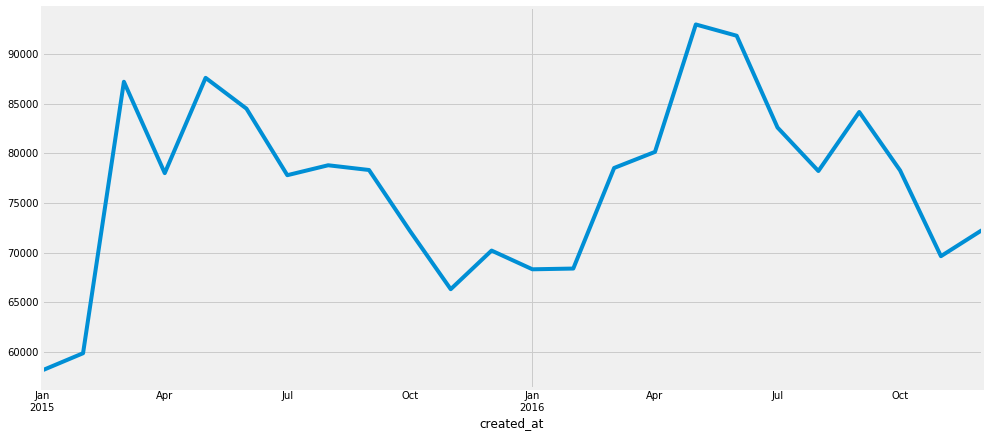

In [30]:
#Resample by Month
df.resample("M")["Unique Key"].count().plot(figsize=(15,7))

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

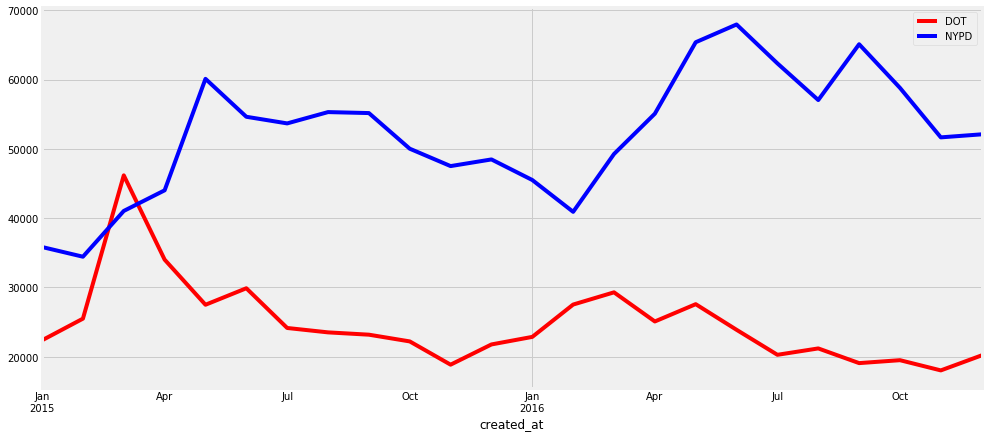

In [31]:
df[df["Agency"] == "DOT"].resample("M")["Unique Key"].count().plot(figsize=(15,7),color="red", legend=True, label="DOT")
df[df["Agency"] == "NYPD"].resample("M")["Unique Key"].count().plot(figsize=(15,7),color = "blue", legend=True, label="NYPD")

In [32]:
#the most popular complaints in the summer
df[df.index.month.isin([6,7,8,9])]["Complaint Type"].value_counts().head()

Noise - Residential       155238
Illegal Parking            77800
Blocked Driveway           72684
Street Condition           64558
Street Light Condition     62202
Name: Complaint Type, dtype: int64

In [33]:
#the most popular complaints in the winter
df[df.index.month.isin([11,12,1,2])]["Complaint Type"].value_counts().head()

Noise - Residential       126728
Blocked Driveway           75707
Illegal Parking            66153
Street Light Condition     59205
Street Condition           55105
Name: Complaint Type, dtype: int64

In [34]:
#the complaint types for the summer and winter are the same
#plot them separately to see if any complaint types follow the larger pattern
#focus on NYPD since the pattern there is more clear
NYPD = df[df["Agency"] == "NYPD"]

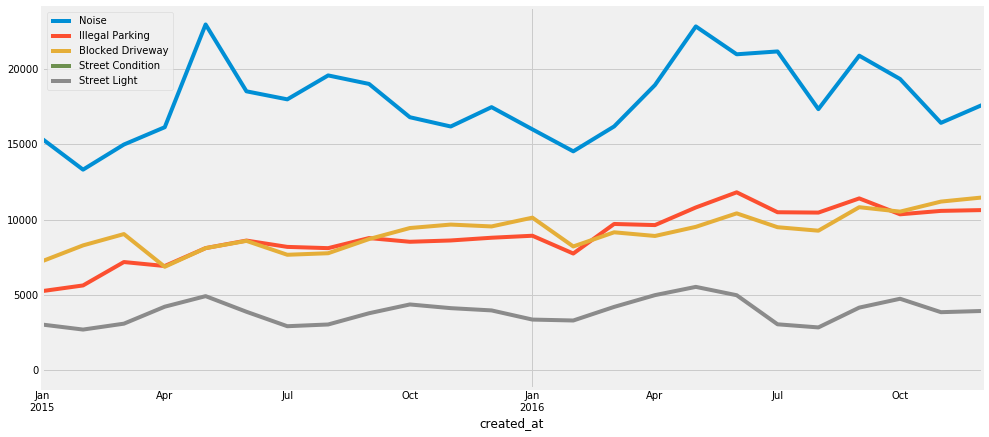

In [35]:
NYPD[NYPD["Complaint Type"] == "Noise - Residential"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Noise')
NYPD[NYPD["Complaint Type"] == "Illegal Parking"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True,label='Illegal Parking' )
NYPD[NYPD["Complaint Type"] == "Blocked Driveway"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Blocked Driveway')
NYPD[NYPD["Complaint Type"] == "Street Condition"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Street Condition')
NYPD[NYPD["Complaint Type"] == "Noise - Commercial"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Street Light')


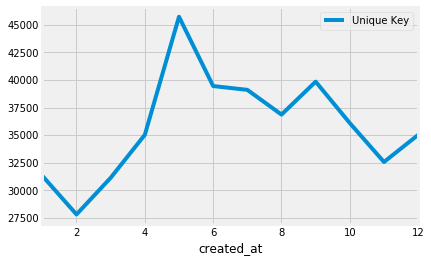

In [36]:
#residential noise follows the winter-summer cycle
#look into the descriptors to see which noise source follows the winter-summer cycle
res_noise = NYPD[NYPD["Complaint Type"] == "Noise - Residential"]
res_noise.groupby(res_noise.index.month).count().plot(y="Unique Key")

In [37]:
res_noise.groupby(res_noise.index.month)['Descriptor'].value_counts()

created_at  Descriptor      
1           Loud Music/Party    18523
            Banging/Pounding    10187
            Loud Talking         1787
            Loud Television       820
2           Loud Music/Party    15881
            Banging/Pounding     9642
            Loud Talking         1550
            Loud Television       748
3           Loud Music/Party    18474
            Banging/Pounding     9832
            Loud Talking         2049
            Loud Television       780
4           Loud Music/Party    22052
            Banging/Pounding     9356
            Loud Talking         2885
            Loud Television       734
5           Loud Music/Party    32537
            Banging/Pounding     8697
            Loud Talking         3815
            Loud Television       668
6           Loud Music/Party    28180
            Banging/Pounding     7566
            Loud Talking         3193
            Loud Television       503
7           Loud Music/Party    28291
            Banging/P

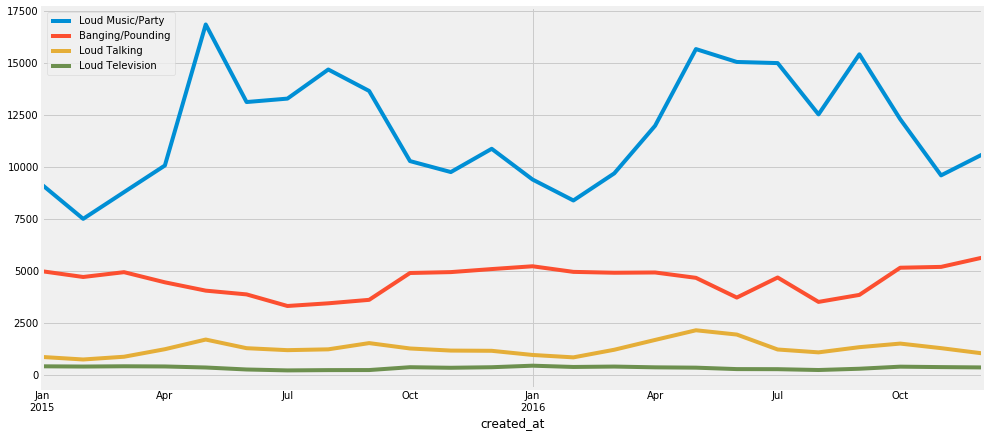

In [38]:
#plot each descriptor to see if any specifically follow the summer-winter pattern
#there are more noise complaints in the summer because loud music/parties are higher in the summer months and lower in the winter months
res_noise[res_noise["Descriptor"] == "Loud Music/Party"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Loud Music/Party')
res_noise[res_noise["Descriptor"] == "Banging/Pounding"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Banging/Pounding')
res_noise[res_noise["Descriptor"] == "Loud Talking"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Loud Talking')
res_noise[res_noise["Descriptor"] == "Loud Television"].resample("M")["Unique Key"].count().plot(figsize=(15,7),legend=True, label='Loud Television')

## Time of day

### What time of day do people complain?

In [39]:
df[:2]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Borough,closed_at
created_at,,,,,,,,,
2015-09-04 22:55:25,31463990,09/04/2015 10:55:25 PM,09/05/2015 02:06:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,BRONX,2015-09-05 02:06:54
2015-09-04 13:53:45,31463991,09/04/2015 01:53:45 PM,09/04/2015 06:37:24 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,2015-09-04 18:37:24


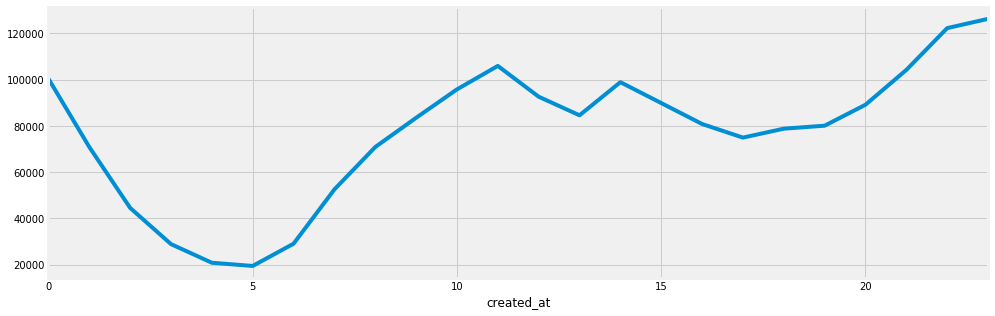

In [40]:
df.groupby(df.index.hour)["Unique Key"].count().plot(figsize=(15,5))

### What time of day do people complain about potholes?

In [41]:
potholes = df[df["Descriptor"].str.contains("Pothole.*", na=False)]

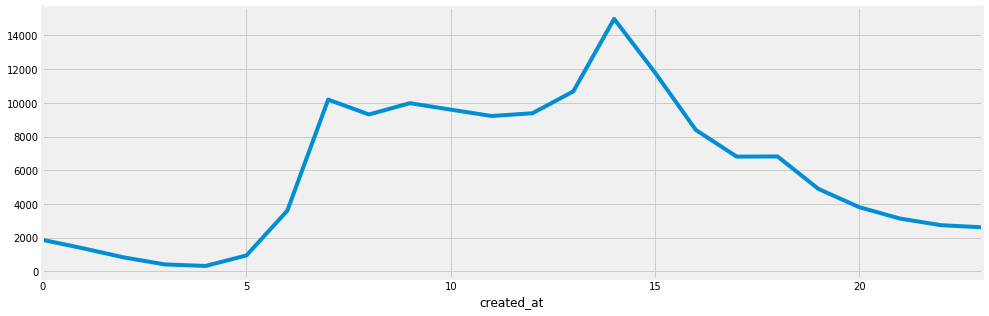

In [42]:
potholes.groupby(potholes.index.hour)["Unique Key"].count().plot(figsize=(15,5))

### What time of day do people complain about loud parties?

In [43]:
parties = df[df["Descriptor"] == "Loud Music/Party"]

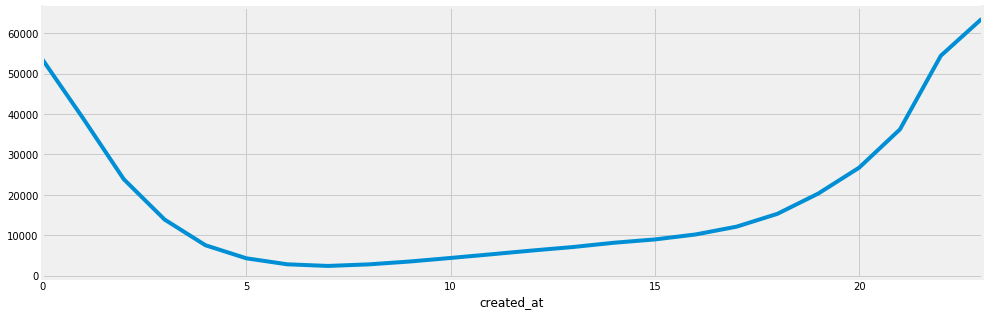

In [44]:
parties.groupby(parties.index.hour)["Unique Key"].count().plot(figsize=(15,5))

## Days of the week

### What days of the week do people complain about potholes?

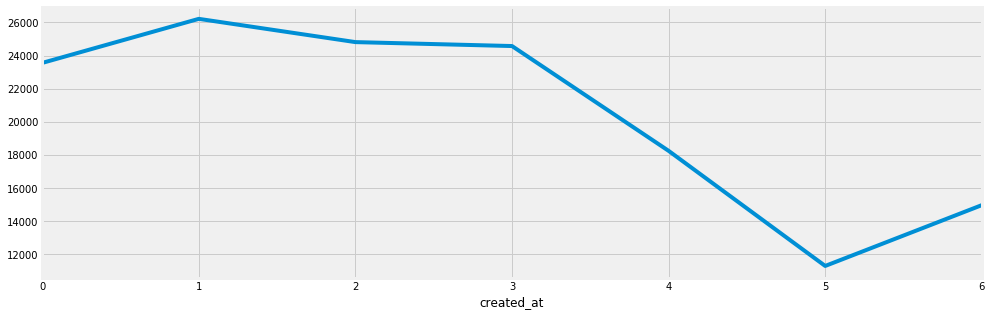

In [45]:
potholes.groupby(potholes.index.dayofweek)["Unique Key"].count().plot(figsize=(15,5))

### What days of the week do people complain about loud parties?

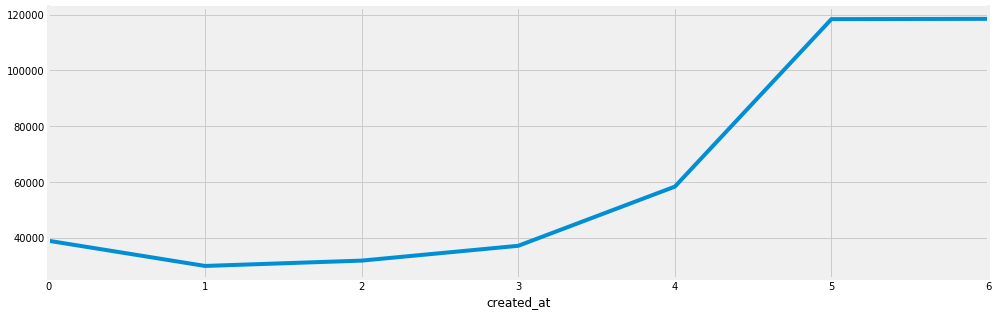

In [46]:
parties.groupby(parties.index.dayofweek)["Unique Key"].count().plot(figsize=(15,5))

### What do you think is the best kind of graph for describing day of the week complaints?

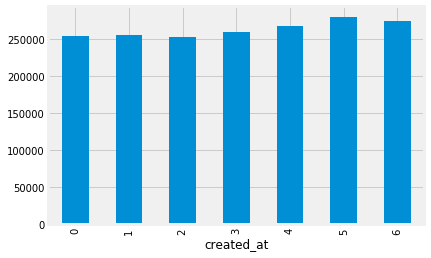

In [47]:
df.groupby(df.index.dayofweek)["Unique Key"].count().plot(kind="bar")

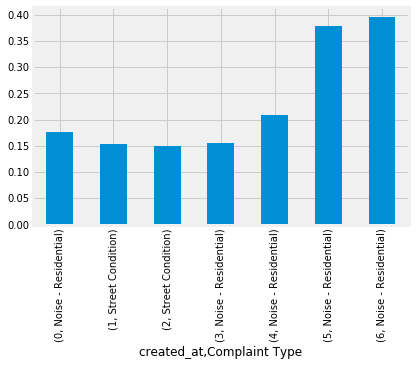

In [48]:
df.groupby(df.index.dayofweek)["Complaint Type"].value_counts(normalize=True).groupby(level=0).head(1).plot(kind="bar")

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

In [49]:
df["Complaint Type"].value_counts()

Noise - Residential            429932
Blocked Driveway               219927
Illegal Parking                215158
Street Condition               215053
Street Light Condition         187228
Noise - Street/Sidewalk        112890
Noise - Commercial              93115
Traffic Signal Condition        79737
Derelict Vehicle                50758
Broken Muni Meter               47234
Noise - Vehicle                 43213
Animal Abuse                    20609
Non-Emergency Police Matter     16716
Street Sign - Damaged           12041
Sidewalk Condition              11630
Traffic                         10825
Highway Condition               10795
Homeless Encampment             10053
Street Sign - Missing            9061
Vending                          8894
Noise - Park                     7995
DOT Literature Request           6028
Curb Condition                   4381
Street Sign - Dangling           4015
Drinking                         2942
Noise - House of Worship         1991
Posting Adve

In [50]:
homeless = df[df["Complaint Type"] == "Homeless Encampment"]

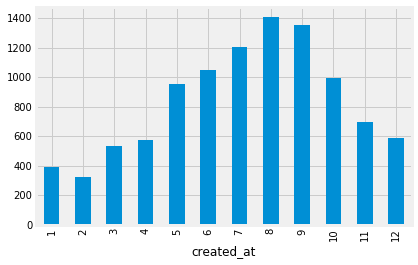

In [51]:
homeless.groupby(homeless.index.month)["Unique Key"].count().plot(kind="bar")

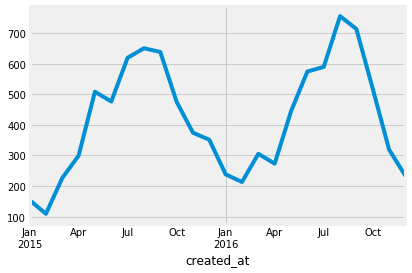

In [52]:
homeless.resample("M")["Unique Key"].count().plot()

## What holiday(s) are most popular for illegal fireworks?

In [53]:
fireworks = df[df["Complaint Type"] == "Illegal Fireworks"]

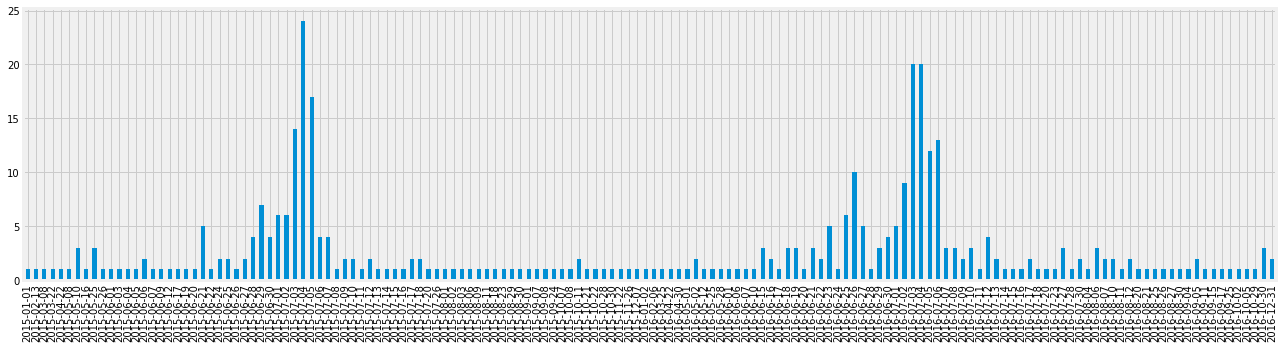

In [54]:
#The fourth of July is the most popular day for 311 mentions about illegal fireworks
fireworks.groupby(fireworks.index.date)["Unique Key"].count().plot(kind="bar", figsize=(20,5))

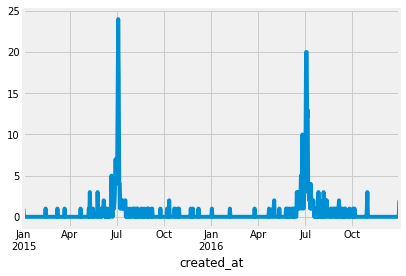

In [55]:
fireworks.resample("D")["Unique Key"].count().plot()

## Plot all kinds of noise complaints on top of each other

In [56]:
noise = df[df["Complaint Type"].str.contains("noise.*", case=False, na=False)]

In [57]:
noise["Complaint Type"].value_counts()

Noise - Residential         429932
Noise - Street/Sidewalk     112890
Noise - Commercial           93115
Noise - Vehicle              43213
Noise - Park                  7995
Noise - House of Worship      1991
Name: Complaint Type, dtype: int64

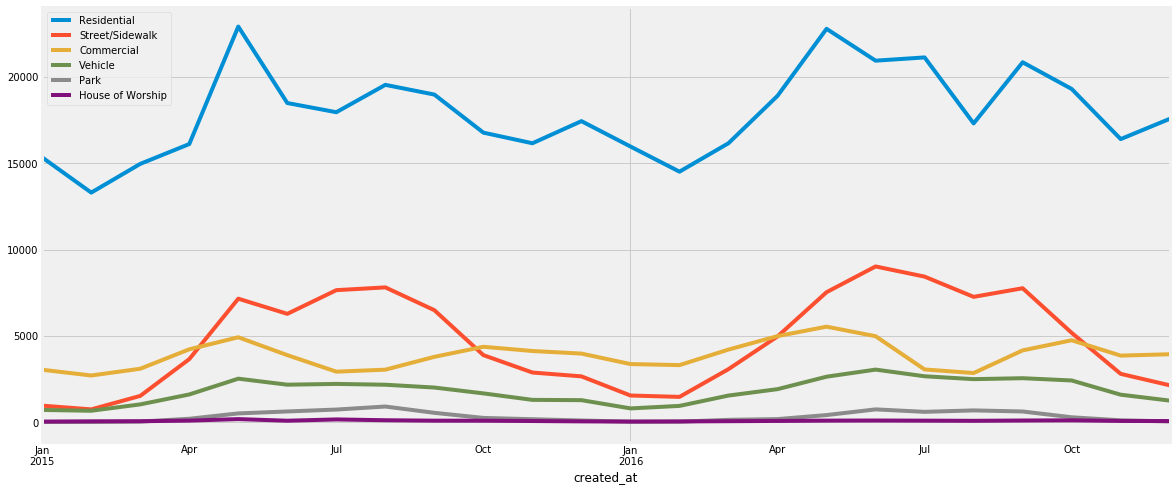

In [59]:
noise[noise["Complaint Type"] == "Noise - Residential"].resample("M")["Unique Key"].count().plot(legend=True, label= "Residential", figsize=(18,8))
noise[noise["Complaint Type"] == "Noise - Street/Sidewalk"].resample("M")["Unique Key"].count().plot(legend=True, label= "Street/Sidewalk")
noise[noise["Complaint Type"] == "Noise - Commercial"].resample("M")["Unique Key"].count().plot(legend=True, label= "Commercial")
noise[noise["Complaint Type"] == "Noise - Vehicle"].resample("M")["Unique Key"].count().plot(legend=True, label= "Vehicle")
noise[noise["Complaint Type"] == "Noise - Park"].resample("M")["Unique Key"].count().plot(legend=True, label= "Park")
noise[noise["Complaint Type"] == "Noise - House of Worship"].resample("M")["Unique Key"].count().plot(legend=True, label= "House of Worship")
